# Pair Programming Intro Regresión Lineal

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que

- Deberéis separar la X y la y.

- Deberéis crear el train y el test.

- Ajustar vuestro modelo.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# 1º INTENTO: Regresión lineal con Label

In [2]:
df_label = pd.read_pickle('../archivos/country_label.pkl')
df_label.sample()

,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,...,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary,basic_boxcox,country_label
4273,United States,0.307692,0.458333,-0.020833,-0.057803,0.57971,1.361818,0.423464,0.284698,1.340659,...,0.143134,0.79301,0.491812,1.141816,1.23151,0.692443,1.003226,1.014925,0.131898,199


In [3]:
# creamos las variables predictoras eliminando las basic y country (que esta encodeada)
X = df_label.drop(["basic_boxcox", "basic", "country"], axis = 1)
y = df_label["basic_boxcox"]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [5]:
lr = LinearRegression(n_jobs=-1)

In [6]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [7]:
y_predict_train = lr.predict(x_train)
y_predict_test = lr.predict(x_test)

In [8]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train), 'Type': ['Label 1']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test), 'Type': ['Label 1']*len(y_test)})
resultados_label = pd.concat([train_df,test_df], axis = 0)
resultados_label.head()

,Real,Predicted,Set,Type
727,-1.142823,-1.012894,Train,Label 1
3032,0.031948,0.038254,Train,Label 1
976,0.046040,0.326759,Train,Label 1
3688,-0.282119,-0.128691,Train,Label 1
3831,-0.136277,-0.025289,Train,Label 1


In [9]:
resultados_label['residuos'] = resultados_label['Real'] - resultados_label['Predicted']
resultados_label.head()

,Real,Predicted,Set,Type,residuos
727,-1.142823,-1.012894,Train,Label 1,-0.129929
3032,0.031948,0.038254,Train,Label 1,-0.006306
976,0.046040,0.326759,Train,Label 1,-0.280719
3688,-0.282119,-0.128691,Train,Label 1,-0.153427
3831,-0.136277,-0.025289,Train,Label 1,-0.110987


In [10]:
cv_scores_label = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

cv_scores_label = pd.DataFrame(cv_scores_label)
cv_scores_label

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.008477,0.002071,0.426966,-0.484247
1,0.004632,0.002704,-533.147784,-17.645720
2,0.003270,0.001715,0.605990,-0.416117
3,0.003394,0.001346,0.630811,-0.425813
4,0.002917,0.001209,0.601901,-0.412153
5,0.004088,0.001766,0.429548,-0.454290
6,0.003440,0.001409,0.295483,-0.536885
7,0.003619,0.001473,0.314666,-0.497324
8,0.005427,0.001651,0.250856,-0.494574
9,0.003364,0.001337,0.269409,-0.517097


In [11]:
print(f'la media para el r2 es {cv_scores_label["test_r2"].mean()}')
print(f'la media para el RMSE es {abs(cv_scores_label["test_neg_root_mean_squared_error"].mean())}')

la media para el r2 es -52.93221556189768
la media para el RMSE es 2.1884221564366078


In [12]:
resultados_metricas_label = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion Label 1", "Linear Regression Label 1"]}

df_resultados_label = pd.DataFrame(resultados_metricas_label)

df_resultados_label

,MAE,MSE,RMSE,R2,set,modelo
0,0.359016,0.208837,0.456987,0.540264,test,Linear Regresion Label 1
1,0.371607,0.224139,0.473433,0.527266,train,Linear Regression Label 1


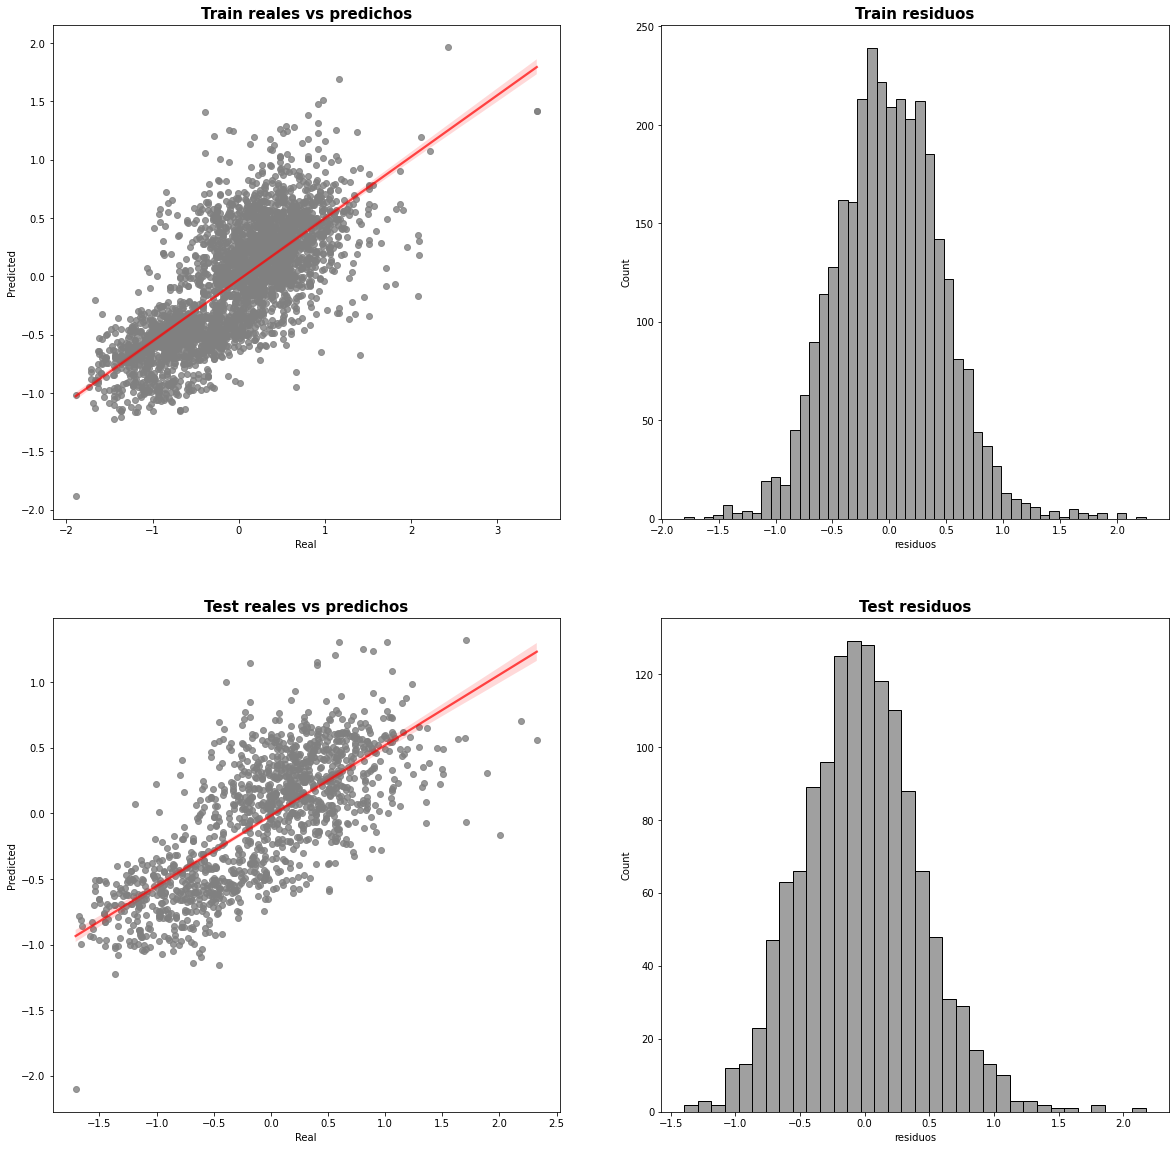

In [13]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

sns.regplot(data = resultados_label[resultados_label['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados_label[resultados_label['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


sns.histplot(resultados_label[resultados_label['Set'] == "Train"],
             x="residuos",
             color ="grey",
            #  kde=True, 
             ax = ax[0,1])


sns.histplot(resultados_label[resultados_label['Set'] == "Test"],
             x="residuos",
             color = "grey",
            #  kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

# 2º INTENTO: Regresión lineal con Dummies

In [14]:
df_dummie = pd.read_pickle('../archivos/country_dummie.pkl')
df_dummie.sample()

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,...,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
1446,-1.025641,-0.388889,1.166667,-0.433526,-0.478261,-0.621818,-0.585908,2.562278,0.923077,-0.5,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Xd = df_dummie.drop(["basic_boxcox", "basic"], axis = 1)
yd = df_dummie["basic_boxcox"]

In [16]:
xd_train, xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size = 0.3, random_state = 42)

In [17]:
lr.fit(xd_train, yd_train)

LinearRegression(n_jobs=-1)

In [18]:
yd_predict_train = lr.predict(xd_train)
yd_predict_test = lr.predict(xd_test)

In [19]:
traind_df = pd.DataFrame({'Real': yd_train, 'Predicted': yd_predict_train, 'Set': ['Train']*len(yd_train), 'Type': ['Dummie 1']*len(yd_train)})
testd_df  = pd.DataFrame({'Real': yd_test,  'Predicted': yd_predict_test,  'Set': ['Test']*len(yd_test), 'Type': ['Dummie 1']*len(yd_test)})
resultados_dummie = pd.concat([traind_df,testd_df], axis = 0)
resultados_dummie.head()

,Real,Predicted,Set,Type
727,-1.142823,-1.478669,Train,Dummie 1
3032,0.031948,0.232736,Train,Dummie 1
976,0.046040,0.354178,Train,Dummie 1
3688,-0.282119,-0.104685,Train,Dummie 1
3831,-0.136277,-0.043672,Train,Dummie 1


In [20]:
resultados_dummie['residuos'] = resultados_dummie['Real'] - resultados_dummie['Predicted']
resultados_dummie.head()

,Real,Predicted,Set,Type,residuos
727,-1.142823,-1.478669,Train,Dummie 1,0.335845
3032,0.031948,0.232736,Train,Dummie 1,-0.200788
976,0.046040,0.354178,Train,Dummie 1,-0.308138
3688,-0.282119,-0.104685,Train,Dummie 1,-0.177434
3831,-0.136277,-0.043672,Train,Dummie 1,-0.092605


In [21]:
cv_scores_dummie = cross_validate(
                estimator = LinearRegression(),
                X         = Xd,
                y         = yd,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores_dummie = pd.DataFrame(cv_scores_dummie)
cv_scores_dummie

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.044753,0.002736,7.102666e-01,-3.443310e-01
1,0.055600,0.003468,-4.675317e+20,-1.650875e+10
2,0.052684,0.002902,8.006529e-01,-2.959831e-01
3,0.047807,0.003460,8.231089e-01,-2.947459e-01
4,0.049163,0.002583,7.835214e-01,-3.039278e-01
5,0.049221,0.002449,7.053091e-01,-3.265180e-01
6,0.048077,0.002981,6.358503e-01,-3.859895e-01
7,0.049803,0.002817,5.701335e-01,-3.938717e-01
8,0.049655,0.002521,5.210810e-01,-3.954394e-01
9,0.048476,0.002997,4.696174e-01,-4.405851e-01


In [22]:
print(f'la media para el r2 es {cv_scores_dummie["test_r2"].mean()}')
print(f'la media para el RMSE es {abs(cv_scores_dummie["test_neg_root_mean_squared_error"].mean())}')

la media para el r2 es -4.67531658601526e+19
la media para el RMSE es 1650874924.0140226


In [23]:
resultados_metricas_dummie = {'MAE': [mean_absolute_error(yd_test, yd_predict_test), mean_absolute_error(yd_train, yd_predict_train)],
                'MSE': [mean_squared_error(yd_test, yd_predict_test), mean_squared_error(yd_train, yd_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(yd_test, yd_predict_test)), np.sqrt(mean_squared_error(yd_train, yd_predict_train))],
                'R2':  [r2_score(yd_test, yd_predict_test), r2_score(yd_train, yd_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion Dummie 1", "Linear Regression Dummie 1"]}

df_resultados_dummie = pd.DataFrame(resultados_metricas_dummie)

df_resultados_dummie

,MAE,MSE,RMSE,R2,set,modelo
0,5.113565e+06,3.526986e+15,5.938843e+07,-7.764362e+15,test,Linear Regresion Dummie 1
1,2.422486e-01,1.075410e-01,3.279345e-01,7.731839e-01,train,Linear Regression Dummie 1


MemoryError: Unable to allocate 208. GiB for an array with shape (27944267307,) and data type float64

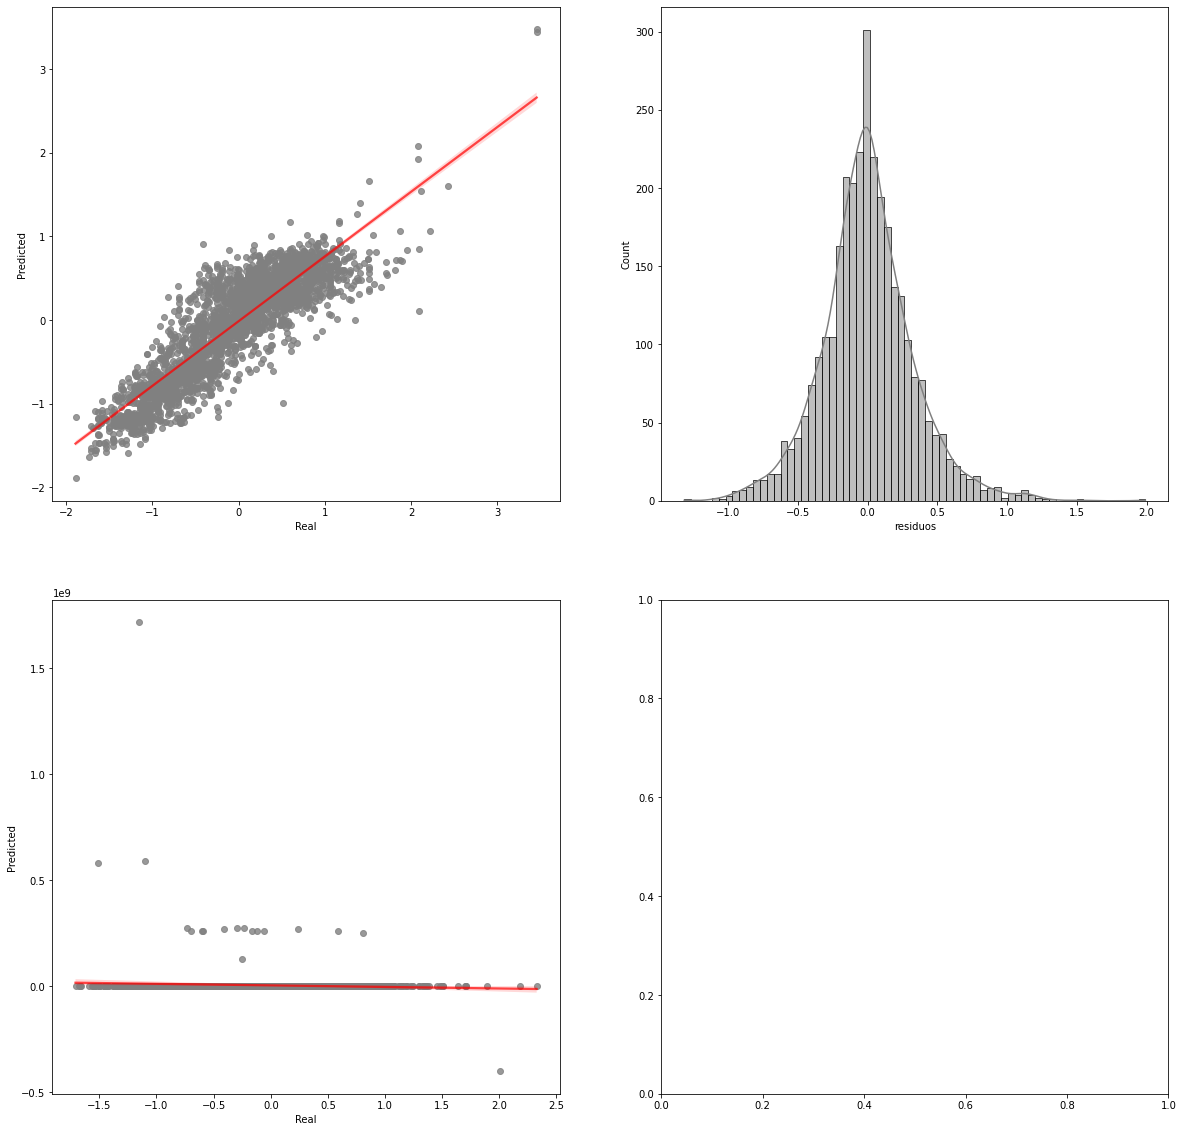

In [24]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

sns.regplot(data = resultados_dummie[resultados_dummie['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })



sns.regplot(data = resultados_dummie[resultados_dummie['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


sns.histplot(resultados_dummie[resultados_dummie['Set'] == "Train"],
             x="residuos",
             color ="grey",
            kde=True, 
             ax = ax[0,1])


sns.histplot(resultados_dummie[resultados_dummie['Set'] == "Test"],
             x="residuos",
             color = "grey",
            kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

# 2º INTENTO: Regresión lineal con Orden

In [35]:
df_orden = pd.read_pickle('../archivos/country_pesos.pkl')

In [36]:
df_orden.head()

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,...,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary,basic_boxcox,country_pesos
0,-0.219373,0.601852,2.395833,1.046243,1.304348,0.747273,4.294342,3.245552,0.307692,1.218954,...,0.465023,-0.302919,1.074934,0.208531,0.101671,1.262442,0.904358,0.517125,0.397744,1
1,-0.350427,0.625000,3.520833,-0.289017,-0.014493,-0.292727,0.338771,0.241993,-0.142857,1.035948,...,-0.534202,-0.439942,1.455932,0.053956,1.617468,2.248014,0.750069,-0.004580,-0.617292,0
2,-0.552707,0.421296,1.791667,-0.398844,-0.384058,-0.490909,0.148560,0.014235,-0.285714,0.570261,...,-0.588840,-0.450326,-0.011987,0.053956,0.335639,2.036034,-0.045124,-0.090119,-0.698365,0
3,-0.923077,-0.069444,-0.625000,-0.514451,-0.934783,-0.505455,-0.656716,-1.081851,-0.461538,0.315359,...,-0.727198,-0.635978,-0.452562,-0.564346,-0.358551,-0.390842,-0.034428,-0.324674,-0.930884,0
4,-0.746439,-0.398148,-0.666667,-0.502890,-0.884058,-0.483636,-0.690038,-0.967972,-0.450549,0.315359,...,-0.602435,-0.670930,-0.661335,-0.475392,-0.409781,-0.590637,-0.371835,-0.347005,-0.719354,0


In [37]:
Xo = df_orden.drop(["basic_boxcox", "basic"], axis = 1)
yo = df_orden["basic_boxcox"]

In [38]:
xo_train, xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size = 0.3, random_state = 42)

In [39]:
lro = LinearRegression(n_jobs=-1)

In [40]:
lro.fit(xo_train, yo_train)

LinearRegression(n_jobs=-1)

In [41]:
yo_predict_train = lro.predict(xo_train)
yo_predict_test = lro.predict(xo_test)

In [42]:
train_dfo = pd.DataFrame({'Real': yo_train, 'Predicted': yo_predict_train, 'Set': ['Train']*len(yo_train), 'Type': ['Label 1']*len(yo_train)})
test_dfo  = pd.DataFrame({'Real': yo_test,  'Predicted': yo_predict_test,  'Set': ['Test']*len(yo_test), 'Type': ['Label 1']*len(yo_test)})
resultados_order = pd.concat([train_dfo,test_dfo], axis = 0)
resultados_order.head()

,Real,Predicted,Set,Type
727,-1.142823,-1.390840,Train,Label 1
3032,0.031948,0.160712,Train,Label 1
976,0.046040,0.376383,Train,Label 1
3688,-0.282119,0.047225,Train,Label 1
3831,-0.136277,-0.009259,Train,Label 1


In [43]:
resultados_order['residuos'] = resultados_order['Real'] - resultados_order['Predicted']
resultados_order.head()

,Real,Predicted,Set,Type,residuos
727,-1.142823,-1.390840,Train,Label 1,0.248016
3032,0.031948,0.160712,Train,Label 1,-0.128764
976,0.046040,0.376383,Train,Label 1,-0.330343
3688,-0.282119,0.047225,Train,Label 1,-0.329343
3831,-0.136277,-0.009259,Train,Label 1,-0.127017


In [44]:
cv_scores_order = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

cv_scores_order = pd.DataFrame(cv_scores_order)
cv_scores_order

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.005781,0.001722,0.426966,-0.484247
1,0.003316,0.001605,-533.147784,-17.645720
2,0.003134,0.001475,0.605990,-0.416117
3,0.003177,0.001355,0.630811,-0.425813
4,0.002588,0.001485,0.601901,-0.412153
5,0.006927,0.001928,0.429548,-0.454290
6,0.003415,0.001589,0.295483,-0.536885
7,0.003407,0.001685,0.314666,-0.497324
8,0.004485,0.001798,0.250856,-0.494574
9,0.003342,0.001671,0.269409,-0.517097


In [45]:
print(f'la media para el r2 es {cv_scores_order["test_r2"].mean()}')
print(f'la media para el RMSE es {abs(cv_scores_order["test_neg_root_mean_squared_error"].mean())}')

la media para el r2 es -52.93221556189768
la media para el RMSE es 2.1884221564366078


In [50]:
resultados_metricas_order = {'MAE': [mean_absolute_error(yo_test, yo_predict_test), mean_absolute_error(yo_train, yo_predict_train)],
                'MSE': [mean_squared_error(yo_test, yo_predict_test), mean_squared_error(yo_train, yo_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(yo_test, yo_predict_test)), np.sqrt(mean_squared_error(yo_train, yo_predict_train))],
                'R2':  [r2_score(yo_test, yo_predict_test), r2_score(yo_train, yo_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion Orden 1", "Linear Regression Orden 1"]}

df_resultados_orden = pd.DataFrame(resultados_metricas_order)

df_resultados_orden

,MAE,MSE,RMSE,R2,set,modelo
0,0.328527,0.176949,0.420653,0.610462,test,Linear Regresion Orden 1
1,0.331308,0.178841,0.422896,0.622805,train,Linear Regression Orden 1


In [51]:
metricas_reg_lineal = pd.concat([df_resultados_label, df_resultados_dummie, df_resultados_orden], axis = 0)

In [52]:
metricas_reg_lineal

,MAE,MSE,RMSE,R2,set,modelo
0,3.590157e-01,2.088367e-01,4.569866e-01,5.402636e-01,test,Linear Regresion Label 1
1,3.716074e-01,2.241389e-01,4.734331e-01,5.272659e-01,train,Linear Regression Label 1
0,5.113565e+06,3.526986e+15,5.938843e+07,-7.764362e+15,test,Linear Regresion Dummie 1
1,2.422486e-01,1.075410e-01,3.279345e-01,7.731839e-01,train,Linear Regression Dummie 1
0,3.285266e-01,1.769487e-01,4.206528e-01,6.104623e-01,test,Linear Regresion Orden 1
1,3.313081e-01,1.788406e-01,4.228955e-01,6.228051e-01,train,Linear Regression Orden 1


dado qeu nuestras variables predictoras y nuestra variable respuesta no cumplen con las asunciones para poder realizar una regresión lineal y por tanto este no sería el modelo a desarrollar, con las métricas obtenidas podemos intuir que el modelo que mejor ha funcionado ha sido en el que hemos hehco el encoding de nuestra variable categórica de manera manual dandole un orden.

Por tanto, si deseáramos mejorar este modelo de regressión lineal, **nos centraríamos en esta modalidad de encoding.**

In [54]:
metricas_reg_lineal.to_csv('../archivos/metricas_reg_lineal.csv')